

# **Optical Character Recognition with PyTesseract & EASY OCR**

- In this lesson we'll implement OCR on a few images using PyTesseract

![](https://miro.medium.com/max/1400/1*X7RfC5wOZ-Gsoo95Ez1FvQ.png) 
Source - https://medium.com/@balaajip/optical-character-recognition-99aba2dad314

## **Great Blogs**
- https://pub.towardsai.net/improving-accuracy-of-text-extraction-with-simple-techniques-195b579a81d8
- https://pyimagesearch.com/2021/11/15/tesseract-page-segmentation-modes-psms-explained-how-to-improve-your-ocr-accuracy/ (***)
- https://www.projectpro.io/article/how-to-train-tesseract-ocr-python/561 (***)
- https://lablab.ai/t/easyocr-and-gpt-extraction-summarization

#### **Install PyTesseract on Colab**

In [1]:
# Install PyTesseract and setup on Colab
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (4,549 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [2]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images 
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/OCRSamples.zip
!unzip -qq OCRSamples.zip

--2023-06-05 05:38:05--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/OCRSamples.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.143.66
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.143.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 237096 (232K) [application/zip]
Saving to: ‘OCRSamples.zip’

OCRSamples.zip      100%[===================>] 231.54K  --.-KB/s    in 0.03s   

2023-06-05 05:38:05 (7.47 MB/s) - ‘OCRSamples.zip’ saved [237096/237096]



## **Our First OCR Trial**

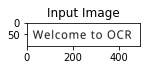

PyTesseract Extracted: Welcome to OCR



In [ ]:
img = cv2.imread('OCR Samples/OCR1.png')
imshow("Input Image", img)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

## **Does white text on blackgrounds work?**

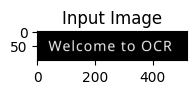

PyTesseract Extracted: Welcome to OCR



In [3]:
img = cv2.imread('OCR Samples/OCR2.png')
imshow("Input Image", img)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

## **What about more messy backgrounds?**

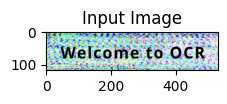

PyTesseract Extracted:  



In [4]:
img = cv2.imread('OCR Samples/OCR3.png')
imshow("Input Image", img)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

## **What about a real life scan?**

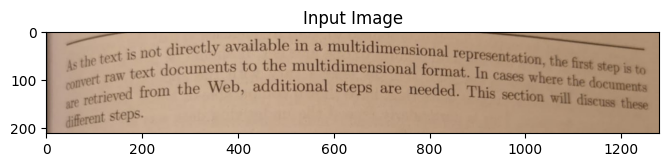

PyTesseract Extracted: directly avail.
able i
e in a multidimensi
Sional re
‘Presentatj
Jon, the
» the first

As the text is not
convert raw text documents
: to th
are retrieved from e multidi
n the Web, eal format
eps are at. In
n cases
eeded. This where the Step is to
ion will discuss
these

different stePs-



In [5]:
img = cv2.imread('OCR Samples/scan2.jpeg')
imshow("Input Image", img, size = 48)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

# **We Need To Clean Up Our Images**

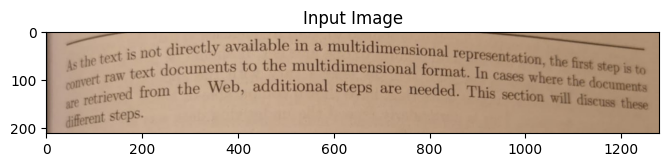

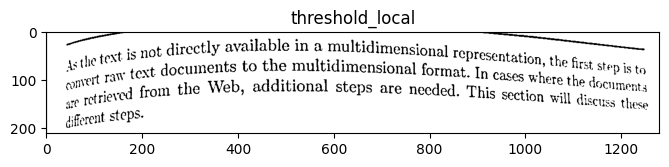

PyTesseract Extracted: j a j multidimensional r
irectly available in a 4
ne text is not direct nts to the multidimensional form,
Ath aw text fo Web, additional steps are necde
‘onl

Cpresentation, the first step is to
at. In cases where the documents

d. This section will discuss these
convert r

are ret rieved fr
diferent StePS-



In [6]:
from skimage.filters import threshold_local

image = cv2.imread('OCR Samples/scan2.jpeg')
imshow("Input Image", image, size = 48)

# We get the Value component from the HSV color space 
# then we apply adaptive thresholdingto 
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

# Apply the threshold operation 
thresh = (V > T).astype("uint8") * 255
imshow("threshold_local", thresh, size = 48)

output_txt = pytesseract.image_to_string(thresh)
print("PyTesseract Extracted: {}".format(output_txt))

### **Thresholding Helps A lot**

Typically a good preprocessing pipeline for OCR recognition will contain some or more of the following processes:
1. Bluring
2. Thresholding
3. Deskewing
4. Dilation/Erosion/Opening/Closing
5. Noise Removal

### **Let's Draw Over Regions Recognized by PyTesseract**

In [7]:
# Get our new test image
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/Receipt-woolworth.jpg

--2023-06-05 05:39:37--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/Receipt-woolworth.jpg
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Receipt-woolworth.jpg [following]
--2023-06-05 05:39:37--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Receipt-woolworth.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93450 (91K) [image/jpeg]
Saving to: ‘Receipt-woolworth.jpg’

Receipt-woolworth.j 100%[===================>]  91.26K  --.-KB/s    in 0.005s  

2023-06-05 05:39:37 (18.9 MB/s) - ‘Receipt-woolworth.jpg’ s

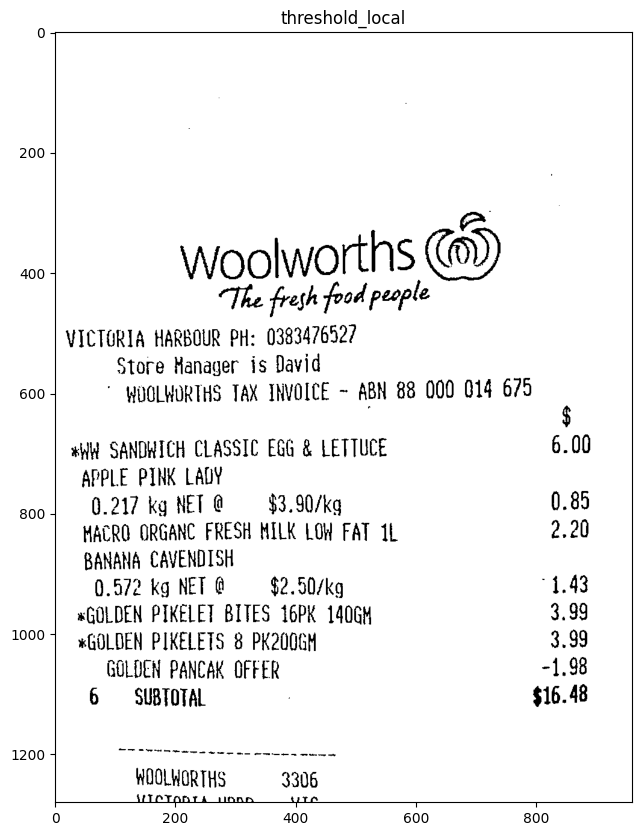

PyTesseract Extracted: o
Woolworths @)
The fresh food people
VICTORIA HARBOUR PH: 0383476527

Store Manager is David
" WOOLHORTHS TAX INVOICE ~ ABN 88 000 014 675

wh SANDWICH CLASSIC EGG & LETTUCE 6.00
APPLE PINK LAUY
G.217 kg NET @ = $3.90/kg 0.85
HACRO ORGANC FRESH NILK LOW FAT IL 2.20
BANANA CAVENDISH
0.572 kg NET @ = $2.50/kg “1.43
GOLDEN PIKELET BITES 16PK 140GH 3.99
GOLDEN PIKELETS 8 PK2OOGH 3.99
GOLDEN PANCAK OFFER -1,98
6 = SUBTOTAL $16.48

WOOLWORTHS 3306

tITAT ANT A DIAnR



In [8]:
from skimage.filters import threshold_local

image = cv2.imread('Receipt-woolworth.jpg')

# We get the Value component from the HSV color space 
# then we apply adaptive thresholdingto 
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

# Apply the threshold operation 
thresh = (V > T).astype("uint8") * 255
imshow("threshold_local", thresh)

output_txt = pytesseract.image_to_string(thresh)
print("PyTesseract Extracted: {}".format(output_txt))

In [9]:
from pytesseract import Output

d = pytesseract.image_to_data(thresh, output_type = Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


Using this dictionary, we can get each word detected, their bounding box information, the text in them and the confidence scores for each.


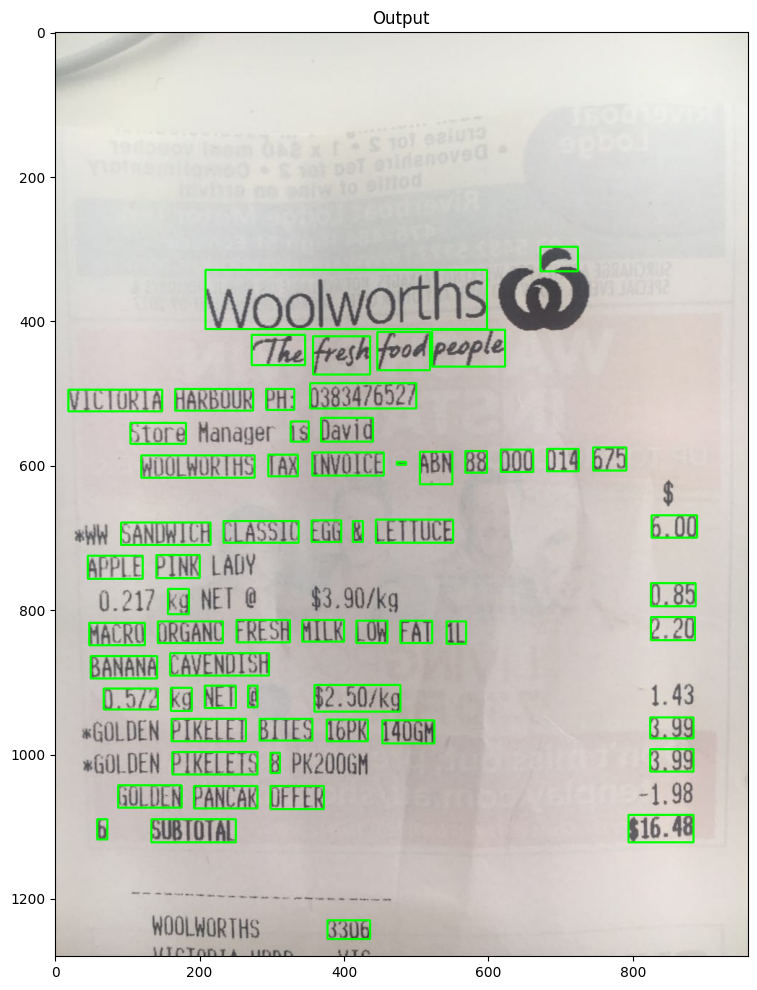

In [11]:
n_boxes = len(d['text'])

for i in range(n_boxes):
    if int(d['conf'][i]) > 50:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

imshow('Output', image, size = 12)


## **EASY OCR**

In [12]:
!pip install easyocr
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/whatsapp_conv.jpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 19.6 MB/s eta 0:00:00
--2023-06-05 05:41:24--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/whatsapp_conv.jpeg
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/whatsapp_conv.jpeg [following]
--2023-06-05 05:41:24--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/whatsapp_conv.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubuser

### **Install older OpenCV (EasyOCR is not compatible with the latest OpenCV here in Colab)**

In [ ]:
!pip uninstall opencv-python -y
!pip install opencv-python-headless==4.1.2.30

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 21.8 MB 1.5 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.64
    Uninstalling opencv-python-headless-4.5.5.64:
      Successfully uninstalled opencv-python-headless-4.5.5.64


## **Detect Text in Image and Show our Input Image**

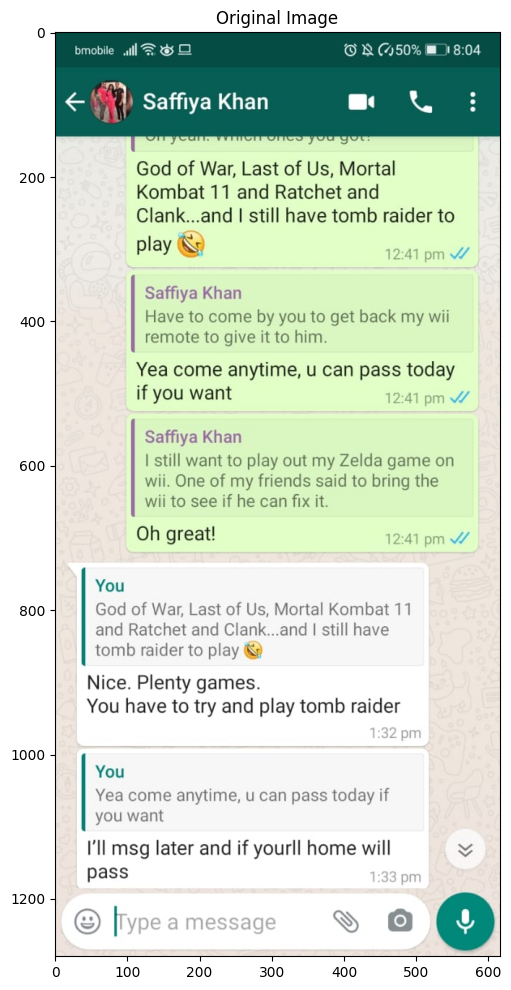

Detecting and OCR'ing text from input image...
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteCompleted in 4.4908576011657715 seconds


In [13]:
# import the necessary packages
from matplotlib import pyplot as plt
from easyocr import Reader
import pandas as pd
import cv2
import time

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# load the input image from disk
image = cv2.imread("whatsapp_conv.jpeg")
imshow("Original Image", image, size = 12)

# OCR the input image using EasyOCR
print("Detecting and OCR'ing text from input image...")
reader = Reader(['en'], gpu = True)

ts = time.time()
results = reader.readtext(image)
te = time.time()
td = te - ts
print(f'Completed in {td} seconds')

In [14]:
results

[([[24, 12], [192, 12], [192, 38], [24, 38]],
  'bmobile ,ill < 82',
  0.11444514416446847),
 ([[396, 12], [510, 12], [510, 38], [396, 38]],
  '"\'0 ^ (50%',
  0.48179992217772444),
 ([[546, 12], [594, 12], [594, 36], [546, 36]], '8.04', 0.9925525784492493),
 ([[114, 74], [302, 74], [302, 122], [114, 122]],
  'Saffiya Khan',
  0.7960116297227916),
 ([[110, 174], [200, 174], [200, 204], [110, 204]],
  'God of',
  0.989818846675026),
 ([[254, 173], [476, 173], [476, 206], [254, 206]],
  'Last of Us, Mortal',
  0.9024050461418952),
 ([[110, 206], [454, 206], [454, 238], [110, 238]],
  'Kombat 11 and Ratchet and',
  0.7717442098362448),
 ([[110, 240], [250, 240], [250, 270], [110, 270]],
  'Clank__and',
  0.8842316403833017),
 ([[264, 238], [558, 238], [558, 270], [264, 270]],
  'still have tomb raider to',
  0.9725837046157862),
 ([[107, 279], [167, 279], [167, 315], [107, 315]],
  'play',
  0.8741207430204966),
 ([[452, 294], [544, 294], [544, 322], [452, 322]],
  '12.41 pm',
  0.9782625

## **Display Text Overlaid onto our Image**

 Probability of Text: 11.445% OCR'd Text: bmobile ,ill < 82
 Probability of Text: 48.180% OCR'd Text: "'0 ^ (50%
 Probability of Text: 99.255% OCR'd Text: 8.04
 Probability of Text: 79.601% OCR'd Text: Saffiya Khan
 Probability of Text: 98.982% OCR'd Text: God of
 Probability of Text: 90.241% OCR'd Text: Last of Us, Mortal
 Probability of Text: 77.174% OCR'd Text: Kombat 11 and Ratchet and
 Probability of Text: 88.423% OCR'd Text: Clank__and
 Probability of Text: 97.258% OCR'd Text: still have tomb raider to
 Probability of Text: 87.412% OCR'd Text: play
 Probability of Text: 97.826% OCR'd Text: 12.41 pm
 Probability of Text: 99.956% OCR'd Text: Saffiya Khan
 Probability of Text: 52.238% OCR'd Text: Have to come by you to get back my wii
 Probability of Text: 56.144% OCR'd Text: remote to give it to him:
 Probability of Text: 79.288% OCR'd Text: Yea come anytime, U can pass today
 Probability of Text: 97.838% OCR'd Text: if you want
 Probability of Text: 99.124% OCR'd Text: 1241 pm
 Pr

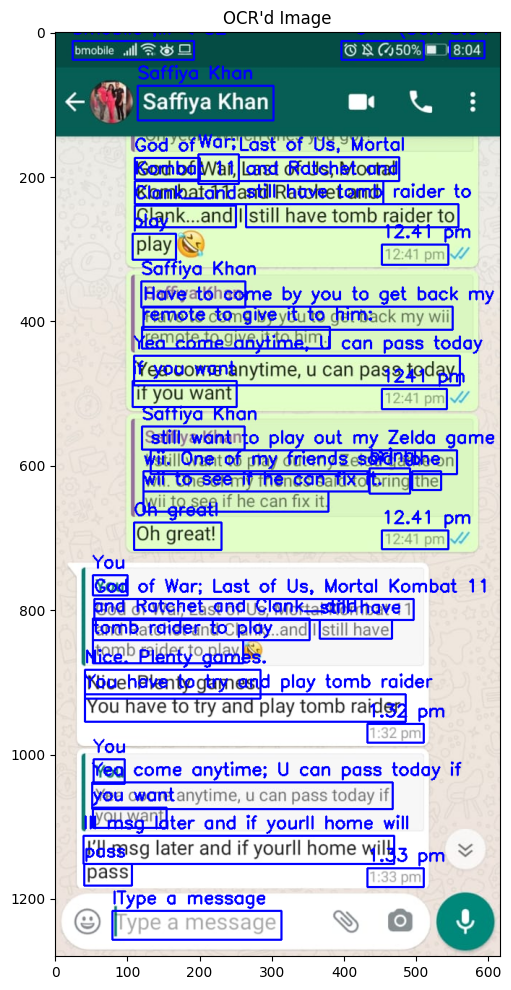

In [15]:
all_text = []

# iterate over our extracted text 
for (bbox, text, prob) in results:
    # display the OCR'd text and the associated probability of it being text
    print(f" Probability of Text: {prob*100:.3f}% OCR'd Text: {text}")

    # get the bounding box coordinates
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # Remove non-ASCII characters from the text so that
    # we can draw the box surrounding the text overlaid onto the original image
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    all_text.append(text)
    cv2.rectangle(image, tl, br, (255, 0, 0), 2)
    cv2.putText(image, text, (tl[0], tl[1] - 10),
      cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# show the output image
imshow("OCR'd Image", image, size = 12)

## **Run on our WoolWorth Reciept**

Progress: |██████████████████████████████████████████████████| 100.0% Complete[INFO] 0.0000: 
[INFO] 0.0000: 
[INFO] 0.0000: 
[INFO] 0.0256: 900
[INFO] 0.9312: Woolworths
[INFO] 0.2742: The fregh food
[INFO] 0.6514: VICIURIA HARBOUR PH:  0383476527
[INFO] 0.7154: Store Hanager
[INFO] 0.5600: i$ ٥avid
[INFO] 0.3288: WUULWURIHS IAX INVOICE
[INFO] 0.6955: ABN 88 000 014 675
[INFO] 0.9768: $
[INFO] 0.1906: *Ah SANDHICH CLASSIC EGG & LETIUCE
[INFO] 0.8898: 6. 00
[INFO] 0.6364: APPLE PINK LALV
[INFO] 0.2521: 0. 217 kg N٤٢
[INFO] 0.9515: $3. 90/k9
[INFO] 0.6532: 0. 85
[INFO] 0.5037: HACRO ORGANC FRESH HILK LOW FAT 1l
[INFO] 0.5489: 2. 20
[INFO] 0.9081: BANANA CAVENDISH
[INFO] 0.3010: 0. 572 k ٤٢
[INFO] 0.3620: 0
[INFO] 0.9983: $2
[INFO] 0.9854: 1. 43
[INFO] 0.5332: *GULDEN PIKELEI BIES 16PK 14OGH
[INFO] 0.9197: 3. 99
[INFO] 0.2487: »GOLIEN PIKELETS 8 PK2UUIH
[INFO] 0.9791: 3. 99
[INFO] 0.3800: fULILN PANCAK OFFER
[INFO] 0.5448: -1. 98
[INFO] 0.4503: ٥
[INFO] 0.3243: SUBTUTAL
[INFO] 0.9972: $1

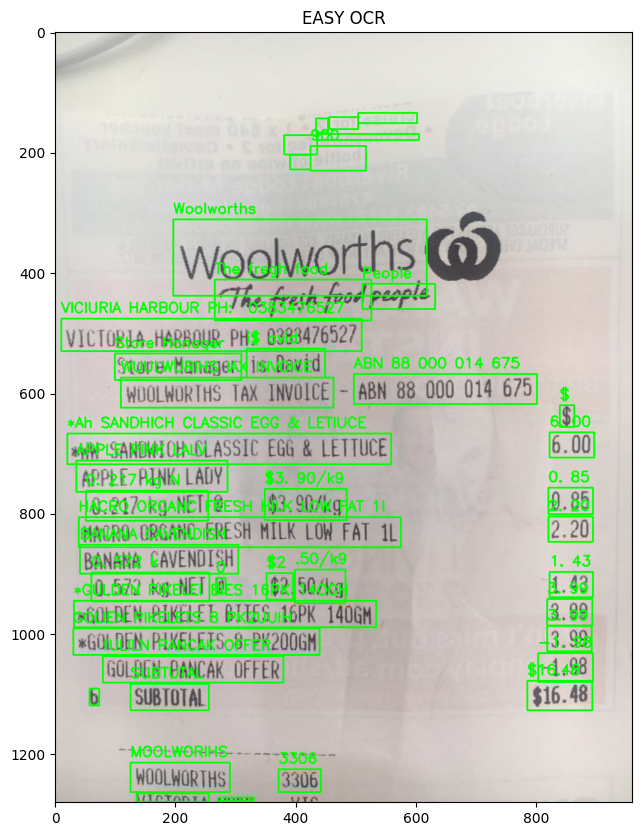

EASY OCR Extracted: .50/k9


In [16]:
import cv2
from easyocr import Reader
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

def clean_text(text):
	# remove non-ASCII text so we can draw the text on the image
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

image = cv2.imread('Receipt-woolworth.jpg')

reader = Reader(["en","ar"], gpu=True)
results = reader.readtext(image)

# loop over the results
for (bbox, text, prob) in results:
	# display the OCR'd text and associated probability
	print("[INFO] {:.4f}: {}".format(prob, text))

	# unpack the bounding box
	(tl, tr, br, bl) = bbox
	tl = (int(tl[0]), int(tl[1]))
	tr = (int(tr[0]), int(tr[1]))
	br = (int(br[0]), int(br[1]))
	bl = (int(bl[0]), int(bl[1]))

	# clean text and draw the box surrounding the text along
	text = clean_text(text)
	cv2.rectangle(image, tl, br, (0, 255, 0), 2)
	cv2.putText(image, text, (tl[0], tl[1] - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Apply the threshold operation 
#thresh = (V > T).astype("uint8") * 255
imshow("EASY OCR", image)
print("EASY OCR Extracted: {}".format(text))